In [33]:
import numpy as np
import pandas as pd
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# calculate accuracy using RSS
# real_y : real label value
# predict_y : label value predicted by linear regression
def RSS(real_y,predict_y) :
    rss = np.sum(pow(real_y-predict_y,2))
    return rss

data = pd.read_csv('linear_regression_data.csv',encoding='utf-8')
print(data)

    Distance  Delivery Time
0        100             20
1        150             20
2        300             36
3        400             47
4        130             22
5        240             31
6        350             47
7        200             24
8        100             19
9        110             19
10       190             23
11       340             39
12       130             18
13       270             34
14       150             21
15       255             30
16       310             35
17       250             28
18       150             28
19       370             46
20       340             36
21       280             27
22       260             34
23       320             37
24       170             23
25       220             29
26       180             22
27       210             25
28       310             38
29       400             50


In [34]:
# split data set(30) into training set(24), test set(6) randomly
# data : original data we want to split
# test_size : size of test data set
# random_state = used to split data randomly as random seed
train, test= train_test_split(data, test_size=0.2,random_state=random.randint(1,100))
print(train) # 24
print(test) # 6

# convert DataFrame to numpy.array
train= train.values
test = test.values
test2 = np.array([500,30, 360, 180,450])

    Distance  Delivery Time
1        150             20
20       340             36
27       210             25
15       255             30
10       190             23
8        100             19
0        100             20
13       270             34
14       150             21
28       310             38
17       250             28
25       220             29
12       130             18
23       320             37
18       150             28
4        130             22
5        240             31
29       400             50
7        200             24
21       280             27
19       370             46
9        110             19
3        400             47
26       180             22
    Distance  Delivery Time
11       340             39
2        300             36
22       260             34
16       310             35
24       170             23
6        350             47


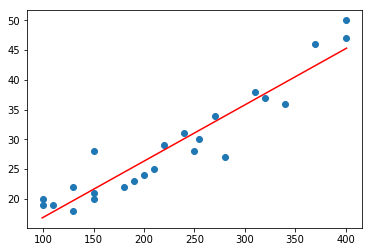

In [35]:
# Train
reg = linear_model.LinearRegression() # create linear regression model
reg.fit(train[:,0,np.newaxis], train[:,1]) # train model using train data set

px = np.array([train[:,0].min()-1,train[:,0].max()+1])
py = reg.predict(px[:,np.newaxis])
plt.scatter(train[:,0],train[:,1])
plt.plot(px,py,color='r')
plt.show()

* Data with label *


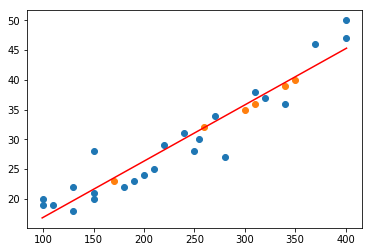

Distance, Delivery Time, Error
    340 	 39 	 0
    300 	 35 	 1
    260 	 32 	 2
    310 	 36 	 -1
    170 	 23 	 0
    350 	 40 	 7
RSS : 55

* Data without label *


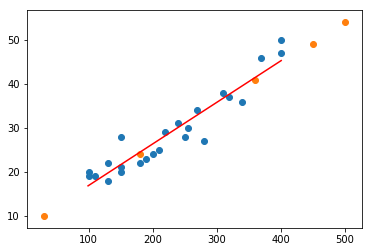

Distance, Delivery Time
500 		 54
30 		 10
360 		 41
180 		 24
450 		 49

Intercpt : 7.454028709812203 , Coef : 0.09442773803199032

The linear regression equation: y = 0.094x+ 7.454
Accuracy 0.9


In [36]:
# Test data set with label
print("* Data with label *")

predict = reg.predict(test[:,0,np.newaxis]).astype("int")

# scatter predicted test data with label
px = np.array([train[:,0].min()-1,train[:,0].max()+1])
py = reg.predict(px[:,np.newaxis])
plt.scatter(train[:,0],train[:,1])
plt.plot(px,py,color='r')
plt.scatter(test[:,0],predict)
plt.show()

print("Distance, Delivery Time, Error")
for i in range(len(test)) :
    print("   ",test[i,0],"\t",predict[i],"\t", test[i,1]-predict[i])

print("RSS :", RSS(test[:,1],predict)) # accuracy using RSS

# Test data set without label
print("\n* Data without label *")

predict2 = reg.predict(test2[:,np.newaxis]).astype("int")

# scatter predicted test data without label    
px = np.array([train[:,0].min()-1,train[:,0].max()+1])
py = reg.predict(px[:,np.newaxis])
plt.scatter(train[:,0],train[:,1])
plt.plot(px,py,color='r')
plt.scatter(test2[:,np.newaxis],predict2)
plt.show()

print("Distance, Delivery Time")
for i in range(len(test2)) :
    print(test2[i],"\t\t",predict2[i])

# The intercept and coef_ of train model
print("\nIntercpt :",reg.intercept_,", Coef :",reg.coef_[0])
# The linear regression equation of train model
print("\nThe linear regression equation: y = {}x+ {}".format(round(reg.coef_[0],3), round(reg.intercept_,3)))
# Accuracy of train model not using RSS
print("Accuracy",round(reg.score(train[:,0,np.newaxis],train[:,1]),2))
